<a href="https://colab.research.google.com/github/Aleksypruszkowski/Machine-Learning-MIMUW/blob/main/Lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7 - Gradient Boosting

### Author: Aleksy Pruszkowski


### Scenario A
The likelihood function takes the form
$$ L\left(y_i,\lambda\right)=-y_i\log\frac{1}{1+e^{-\lambda}}-\left(1-y_i\right)\log\left(1-\frac{1}{1+e^{-\lambda}}\right),$$
the derivative is
$$\frac{\partial}{\partial\lambda}\sum_{i=1}^n L\left(y_i,\lambda\right)= \sum_{i=1}^n -y_i\frac{1}{1+e^\lambda}+\left(1-y_i\right)\frac{e^\lambda}{e^\lambda+1}=\\
\sum_{i=1}^n \frac{1}{1+e^\lambda}\left(-y_i\right)\left(1+e^\lambda\right)+\frac{e^\lambda}{1+e^\lambda}=\left(\sum_{i=1}^n-y_i\right)+n\frac{e^\lambda}{1+e^\lambda}=0.$$
Then we get
$$\left(1+e^\lambda\right)\left(\frac{1}{n}\sum_{i=1}^ny_i\right)=e^\lambda$$
\
$$e^\lambda=\frac{\frac{1}{n}\sum_{i=1}^n y_i}{1-\sum_{i=1}^n y_i}$$
\
$$\lambda_{min} = \log\frac{m}{n}-\log\left(1-\frac{m}{n}\right) = \log\frac{m}{k}.$$

For Binary Cross-Entropy the term $\frac{1}{1+e^{\lambda}}$ may be interpreted as predicted probability of of the observation being in a class denoted as "1", so $\frac{1}{1+e^{\lambda}}≈\frac{m}{n}$ and from that we get theformula for $\lambda_{min}$.

### Scenario B
As previously we have the likelihood function
$$L\left(y_i,f_i+\lambda\right)=-y_i\log\left(\frac{1}{1+\exp\left(-f_i-\lambda\right)}\right)-\left(1-y_i\right)\log\left(1-\frac{1}{1+\exp\left(-f_i-\lambda\right)}\right)$$\
$$\frac{\partial}{\partial\lambda}\sum_{i=1}^n L\left(y_i,f_i+\lambda\right)= \sum_{i=1}^n -y_i\frac{1}{\exp\left(-f_i-\lambda\right)+1}+\left(1-y_i\right)\frac{\exp\left(-f_i-\lambda\right)}{\exp\left(-f_i-\lambda\right)+1=0}.$$\
$$\sum_{i=1}^n -y_i\frac{1}{\exp\left(-f_i-\lambda\right)+1}+\frac{\exp\left(-f_i-\lambda\right)}{\exp\left(-f_i-\lambda\right)+1}-y_i\frac{\exp\left(-f_i-\lambda\right)}{\exp\left(-f_i-\lambda\right)+1}=0$$\
$$\sum_{i=1}^n -y_i\frac{1}{\exp\left(-f_i-\lambda\right)+1}\left(1+\exp\left(-f_i-\lambda\right)\right)+\frac{\exp\left(-f_i-\lambda\right)}{\exp\left(-f_i-\lambda\right)+1}=0$$\
$$\sum_{i=1}^n y_i=\sum_{i=1}^n \frac{\exp\left(-f_i-\lambda\right)}{\exp\left(-f_i-\lambda\right)+1}.$$\
Now, we have no way of extracting $\lambda$ minimising the loss function.

In [1]:
from numpy import random
import numpy as np
import math
import matplotlib.pyplot as plt

np.random.seed(42)
n = 100
k = 70
m = n-k
y = np.array([1]*m + [0]*k)
np.random.shuffle(y)
f = np.random.normal(size=n)

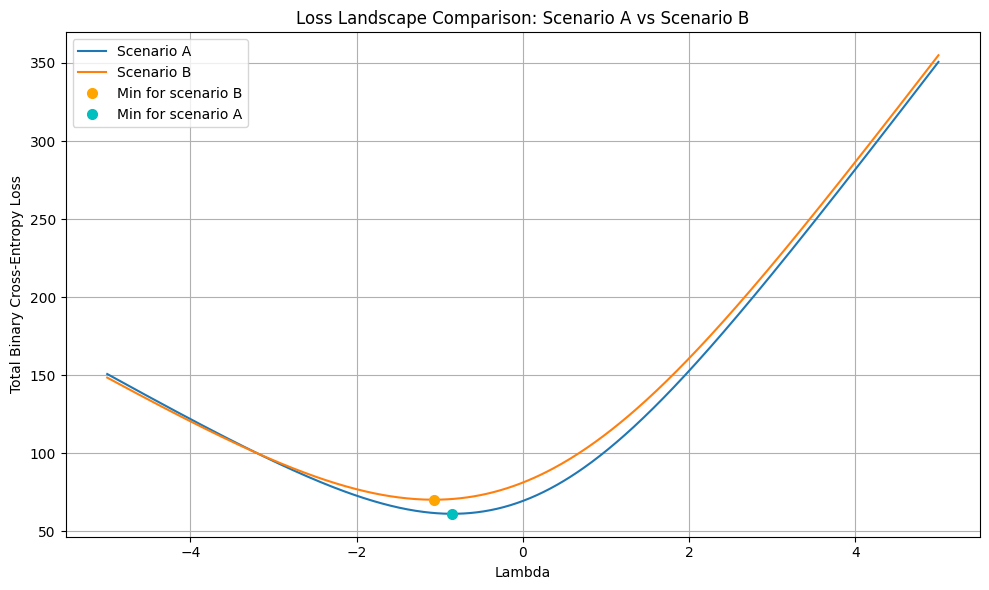

In [2]:
lambda_vals = np.linspace(-5, 5, 500)
loss_A = np.array([
    np.sum(-y * np.log(1/(1+np.exp(-l))) - (1 - y) * np.log(1 - 1/(1+np.exp(-l))))
    for l in lambda_vals])
loss_B = np.array([
    np.sum(-y * np.log(1/(1+np.exp(-f-l))) - (1-y)*np.log(1-(1/(1+np.exp(-f-l)))))
    for l in lambda_vals])
plt.figure(figsize=(10, 6))
plt.plot(lambda_vals, loss_A, label='Scenario A')
plt.plot(lambda_vals, loss_B, label='Scenario B')
plt.plot([lambda_vals[np.argmin(loss_B)]], [np.min(loss_B)], '.', markersize=14, color = 'orange', label = "Min for scenario B")
plt.plot([np.log(m/k)], [np.min(loss_A)], '.', markersize=14, color = 'c', label = "Min for scenario A")
plt.xlabel('Lambda')
plt.ylabel('Total Binary Cross-Entropy Loss')
plt.title('Loss Landscape Comparison: Scenario A vs Scenario B')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

For scenario A the loss curve is smooth and convex. Global minimum exists and is located at $\lambda=\frac{m}{k}.$ The loss curve in scenario B is similar to the one in scenario A, it's still smooth and convex. The loss curve is simple and the difficulty in scenario B comes from the non-linearity of the problem. The minimum can still be found numerically.